In [45]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [46]:
data = pd.read_csv("./train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [47]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
data = data.drop(["PassengerId", "Name", "Cabin"], axis=1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [49]:
# Look NA values of each col
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [50]:
# Na value count of age is much, so we need to replace NA values instead of delete them
# Mean and median of Age is close so we can use mean to replace them
data["Age"].fillna(value=np.mean(data["Age"]), inplace=True)
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

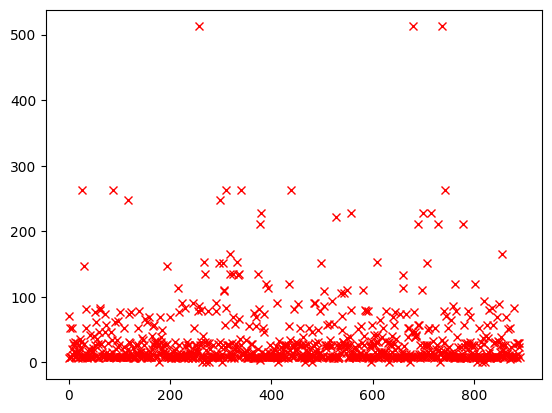

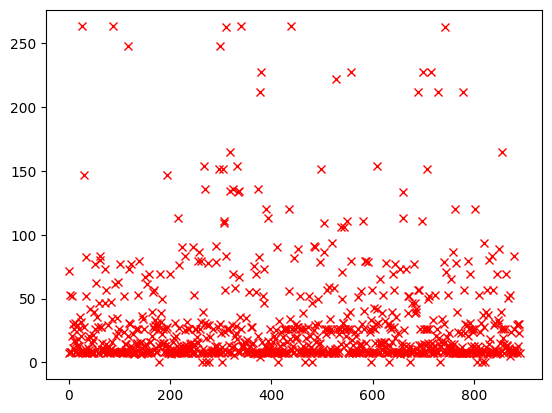

In [51]:
# Clear high valued data to reduce std of Fare property of data
plt.plot(data["Fare"], "rx")
plt.show()
data = data[data["Fare"] < 400]
plt.plot(data["Fare"], "rx")
plt.show()

In [52]:
data["Ticket"] = data["Ticket"].apply(lambda x: x[0])
data

C:\Users\DELL G3\AppData\Roaming\temp\ipykernel_38924\3193434471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Ticket"] = data["Ticket"].apply(lambda x: x[0])


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.000000,1,0,A,7.2500,S
1,1,1,female,38.000000,1,0,P,71.2833,C
2,1,3,female,26.000000,0,0,S,7.9250,S
3,1,1,female,35.000000,1,0,1,53.1000,S
4,0,3,male,35.000000,0,0,3,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,2,13.0000,S
887,1,1,female,19.000000,0,0,1,30.0000,S
888,0,3,female,29.699118,1,2,W,23.4500,S
889,1,1,male,26.000000,0,0,1,30.0000,C


In [53]:
columns_to_encode = ["Pclass", "Sex", "Ticket", "Embarked"]
encoded_cols = dict()
for col in columns_to_encode:
    encoded_cols[col] = pd.get_dummies(data[col], dtype="int")

In [54]:
# Remove current cols to encode
data = data.drop(columns_to_encode, axis = 1)

# Concatenate encoded cols
for col in columns_to_encode:
    data = pd.concat([data, encoded_cols[col]], axis = 1)
data

,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,...,A,C,F,L,P,S,W,C,Q,S
0,0,22.000000,1,0,7.2500,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,1,26.000000,0,0,7.9250,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,35.000000,0,0,8.0500,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
888,0,29.699118,1,2,23.4500,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
889,1,26.000000,0,0,30.0000,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [55]:
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

m = 800

X_train = X.iloc[0:m, :]
X_test = X.iloc[m:X.shape[0], :]

Y_train = Y.iloc[0:m]
Y_test = Y.iloc[m:Y.shape[0]]

In [56]:
# Standardize train data
transformation = dict()

transformation["mean_X_train"] = np.mean(X_train.iloc[:,0:4], axis = 0)
transformation["std_X_train"] = np.std(X_train.iloc[:,0:4], axis = 0)

X_train.iloc[:, 0:4] = (X_train.iloc[:,0:4] - transformation["mean_X_train"]) / transformation["std_X_train"]

X_train

,Age,SibSp,Parch,Fare,1,2,3,female,male,1,...,A,C,F,L,P,S,W,C,Q,S
0,-0.600732,0.450460,-0.468600,-0.567707,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,0.631761,0.450460,-0.468600,0.942789,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,-0.292609,-0.490449,-0.468600,-0.551784,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0.400668,0.450460,-0.468600,0.513859,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0.400668,-0.490449,-0.468600,-0.548836,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,0.015514,-0.490449,-0.468600,-0.568198,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
799,0.015514,0.450460,0.776849,-0.169049,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
800,0.323637,-0.490449,-0.468600,-0.432069,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
801,0.092545,0.450460,0.776849,-0.119512,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [57]:
# Standardize test data
transformation = dict()

transformation["mean_X_test"] = np.mean(X_test.iloc[:,0:4], axis = 0)
transformation["std_X_test"] = np.std(X_test.iloc[:,0:4], axis = 0)

X_test.iloc[:, 0:4] = (X_test.iloc[:,0:4] - transformation["mean_X_test"]) / transformation["std_X_test"]

X_test

,Age,SibSp,Parch,Fare,1,2,3,female,male,1,...,A,C,F,L,P,S,W,C,Q,S
803,-2.128697,-0.391825,0.679157,-0.580448,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
804,-0.121055,-0.391825,-0.516160,-0.638592,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
805,0.181073,-0.391825,-0.516160,-0.608421,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
806,0.785329,-0.391825,-0.516160,-0.901645,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
807,-0.800844,-0.391825,-0.516160,-0.608421,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.121055,-0.391825,-0.516160,-0.411367,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
887,-0.725312,-0.391825,-0.516160,0.229766,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
888,0.082815,0.311860,1.874474,-0.017259,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
889,-0.196587,-0.391825,-0.516160,0.229766,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0


Epoch 1/50
25/25 [==============================] - 1s 8ms/step - loss: 0.6751 - accuracy: 0.6450 - val_loss: 0.6474 - val_accuracy: 0.8068
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6343 - accuracy: 0.7763 - val_loss: 0.5927 - val_accuracy: 0.8295
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5745 - accuracy: 0.7900 - val_loss: 0.5081 - val_accuracy: 0.7955
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5010 - accuracy: 0.8050 - val_loss: 0.4298 - val_accuracy: 0.8182
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4498 - accuracy: 0.8138 - val_loss: 0.3986 - val_accuracy: 0.8523
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.8175 - val_loss: 0.3879 - val_accuracy: 0.8750
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8313 - val_loss: 0.3843 - val_accuracy: 0.8750
Epoch 8/50
25/25 [==

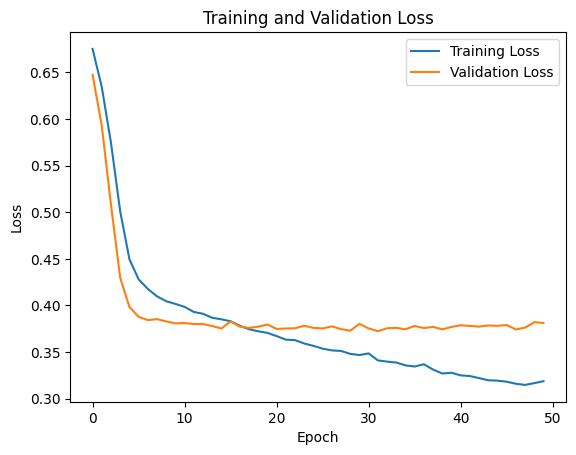

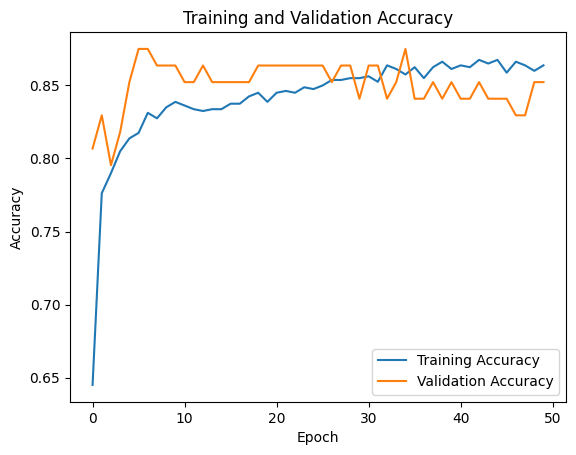

Final train Loss: 	0.31880614161491394
Final validation Loss: 	0.3812582194805145
Final train Accuray: 	0.8637499809265137
Final validation Accuray: 	0.8522727489471436


In [58]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape = (X.shape[1])))
model.add(tf.keras.layers.Dense(20, activation = "relu"))
model.add(tf.keras.layers.Dense(20, activation = "relu"))
model.add(tf.keras.layers.Dense(20, activation = "relu"))
model.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(f"Final train Loss: \t{history.history['loss'][-1]}")
print(f"Final validation Loss: \t{history.history['val_loss'][-1]}")
print(f"Final train Accuray: \t{history.history['accuracy'][-1]}")
print(f"Final validation Accuray: \t{history.history['val_accuracy'][-1]}")

In [59]:
data_test = pd.read_csv("test.csv")
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [60]:
data_test = data_test.drop(["PassengerId", "Name", "Cabin"], axis=1)
data_test

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,34.5,0,0,330911,7.8292,Q
1,3,female,47.0,1,0,363272,7.0000,S
2,2,male,62.0,0,0,240276,9.6875,Q
3,3,male,27.0,0,0,315154,8.6625,S
4,3,female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,A.5. 3236,8.0500,S
414,1,female,39.0,0,0,PC 17758,108.9000,C
415,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,3,male,NaN,0,0,359309,8.0500,S


In [61]:
# Look NA values of each col
data_test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
Embarked     0
dtype: int64

In [62]:
data_test["Age"].fillna(value=np.mean(data_test["Age"]), inplace=True)
data_test["Fare"].fillna(value=np.mean(data_test["Fare"]), inplace=True)
data_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [63]:
data_test["Ticket"] = data_test["Ticket"].apply(lambda x: x[0])

columns_to_encode = ["Pclass", "Sex", "Ticket", "Embarked"]
encoded_cols = dict()
for col in columns_to_encode:
    encoded_cols[col] = pd.get_dummies(data_test[col], dtype="int")

# Remove current cols to encode
data_test = data_test.drop(columns_to_encode, axis = 1)
data_test

,Age,SibSp,Parch,Fare
0,34.50000,0,0,7.8292
1,47.00000,1,0,7.0000
2,62.00000,0,0,9.6875
3,27.00000,0,0,8.6625
4,22.00000,1,1,12.2875
...,...,...,...,...
413,30.27259,0,0,8.0500
414,39.00000,0,0,108.9000
415,38.50000,0,0,7.2500
416,30.27259,0,0,8.0500


In [64]:
# We add manually extra columns for Tickets that start with 5 and 8 to keep consistency. Train set has the data that includes these tickets but test set does not. We add them manuelly to encoded cols dict.

encoded_cols["Ticket"] = pd.concat([encoded_cols["Ticket"].iloc[:,0:4], pd.DataFrame(np.zeros((encoded_cols["Ticket"].shape[0],1))), encoded_cols["Ticket"].iloc[:,4:6], pd.DataFrame(np.zeros((encoded_cols["Ticket"].shape[0],1))), encoded_cols["Ticket"].iloc[:,6:]] ,axis=1)
encoded_cols["Ticket"]

,1,2,3,4,0,6,7,0,9,A,C,F,L,P,S,W
0,0,0,1,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0
1,0,0,1,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0
2,0,1,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0
3,0,0,1,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0
4,0,0,1,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,0,0,0.0,0,0,0.0,0,1,0,0,0,0,0,0
414,0,0,0,0,0.0,0,0,0.0,0,0,0,0,0,1,0,0
415,0,0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,1,0
416,0,0,1,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0


In [65]:
# Concatenate encoded cols
for col in columns_to_encode:
    data_test = pd.concat([data_test, encoded_cols[col]], axis = 1)
data_test

,Age,SibSp,Parch,Fare,1,2,3,female,male,1,...,A,C,F,L,P,S,W,C,Q,S
0,34.50000,0,0,7.8292,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,47.00000,1,0,7.0000,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,62.00000,0,0,9.6875,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,27.00000,0,0,8.6625,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,22.00000,1,1,12.2875,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,30.27259,0,0,8.0500,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
414,39.00000,0,0,108.9000,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
415,38.50000,0,0,7.2500,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
416,30.27259,0,0,8.0500,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [66]:
# Standardize

data_test.iloc[:,0:4] = (data_test.iloc[:,0:4] - np.mean(data_test.iloc[:,0:4], axis = 0)) / np.std(data_test.iloc[:,0:4], axis = 0)
data_test

,Age,SibSp,Parch,Fare,1,2,3,female,male,1,...,A,C,F,L,P,S,W,C,Q,S
0,0.334993,-0.499470,-0.400248,-0.498407,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1.325530,0.616992,-0.400248,-0.513274,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2.514175,-0.499470,-0.400248,-0.465088,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.259330,-0.499470,-0.400248,-0.483466,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.655545,0.616992,0.619896,-0.418471,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.000000,-0.499470,-0.400248,-0.494448,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
414,0.691586,-0.499470,-0.400248,1.313753,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
415,0.651965,-0.499470,-0.400248,-0.508792,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
416,0.000000,-0.499470,-0.400248,-0.494448,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
prediction = model.predict(data_test)
prediction

14/14 [==============================] - 0s 984us/step


array([[2.43958291e-02],
       [5.89566052e-01],
       [3.72434221e-02],
       [6.76639602e-02],
       [3.31462562e-01],
       [7.69494697e-02],
       [7.58847296e-01],
       [1.05232656e-01],
       [5.33984184e-01],
       [2.47623269e-02],
       [6.50384724e-02],
       [1.68637216e-01],
       [9.93696392e-01],
       [1.54815689e-01],
       [9.91301537e-01],
       [9.53324616e-01],
       [3.52372639e-02],
       [3.03241462e-01],
       [4.87937897e-01],
       [5.92696071e-01],
       [6.84186280e-01],
       [8.65565658e-01],
       [9.72835779e-01],
       [6.56931818e-01],
       [9.72990572e-01],
       [1.79587491e-02],
       [9.93752420e-01],
       [2.96703547e-01],
       [2.41409853e-01],
       [9.45582017e-02],
       [1.20227769e-01],
       [1.81055248e-01],
       [7.78632045e-01],
       [5.33966050e-02],
       [7.48368382e-01],
       [3.16920042e-01],
       [3.70606750e-01],
       [5.68104506e-01],
       [6.89163879e-02],
       [4.61360753e-01],


In [68]:
prediction[prediction < 0.5] = 0
prediction[prediction >= 0.5] = 1
prediction

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],

In [69]:
data_test = pd.read_csv("test.csv")
result = pd.concat([data_test["PassengerId"], pd.DataFrame(prediction, columns = ["Survived"], dtype="int")], axis = 1)
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [70]:
result.to_csv("result.csv", index = False)